In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import numpy as np
import ChromFormer
import sys
from ChromFormer.data_generation.Uniform_Cluster_Walk import synthetic_biological_uniform_data_generator, generate_biological_structure
from ChromFormer.Data_Tools.Data_Calculation import generate_hic, import_trussart_data
from ChromFormer.Data_Tools.Data_Plotting import plot_structure_in_sphere, plot_hic, plot_optimal_transport
from dotenv import load_dotenv
import os
load_dotenv() 
DATA_DIR = os.environ.get('DATA_DIR')
DATA_PATH=f'{DATA_DIR}/biological_trussart_uniform/'
NB_TRAINING = 800
NB_testing = 200
NB_BINS = 202
DELTA = 0.45
ST_SIG = 5
END_SIG = 7
SIG = 4
CLUST_SIG = 1.5
CLUST_PROB = 0.1
SECONDSTEP = False
SEED = 42
EXPONENT = 1
ICING = True
MINMAXUSE= False
TRANSPORTATION = True
SOFTMAXING = False


Structure Generation

In [8]:
synthetic_biological_structure = generate_biological_structure(nb_nodes = 202, delta = 0.45, start_sigma= 5,
                                                               end_sigma = 7, sigma = 4, 
                                                               cluster_sigma=1.5, cluster_proba = 0.1, step2 = False)


In [9]:
plot_structure_in_sphere(synthetic_biological_structure)

In [10]:
trussart_hic, trussart_structure = import_trussart_data(DATA_DIR)

In [11]:
new_hic = generate_hic(None, synthetic_biological_structure, trussart_hic, use_ice =True, use_minmax =True, use_ot = False, use_softmax =True, seed =42, plot_optimal_transport =False, exponent =1)


Synthetic HI-C with ICE and Softmax

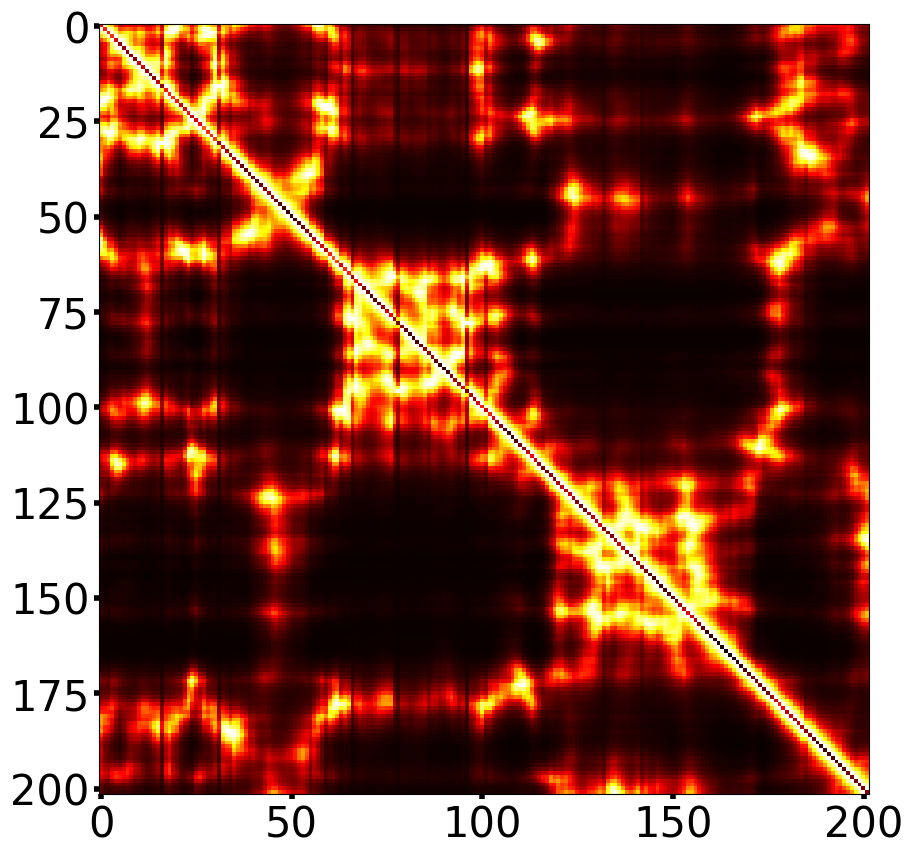

In [12]:
plot_hic(new_hic)

Synthetic HI-C without ICE or softmax

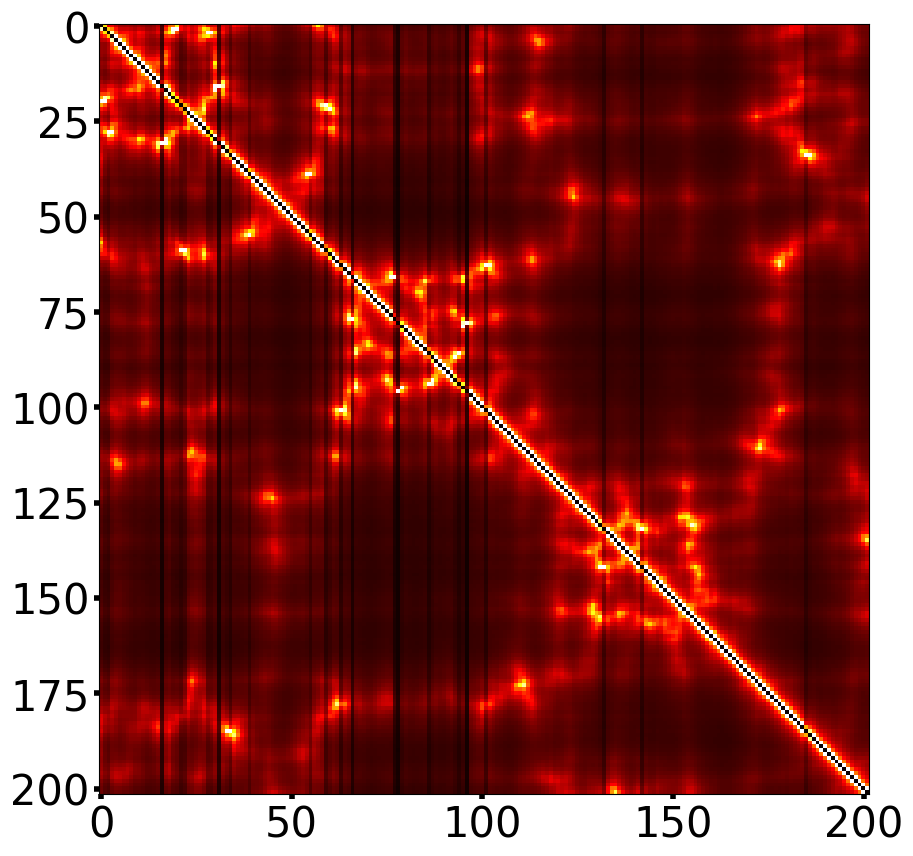

In [13]:
new_hic = generate_hic(None, synthetic_biological_structure, trussart_hic, use_ice =False, use_minmax =True, use_ot = False, use_softmax =False, seed =42, plot_optimal_transport =False, exponent =1)
plot_hic(new_hic)

True Trussart HI-C

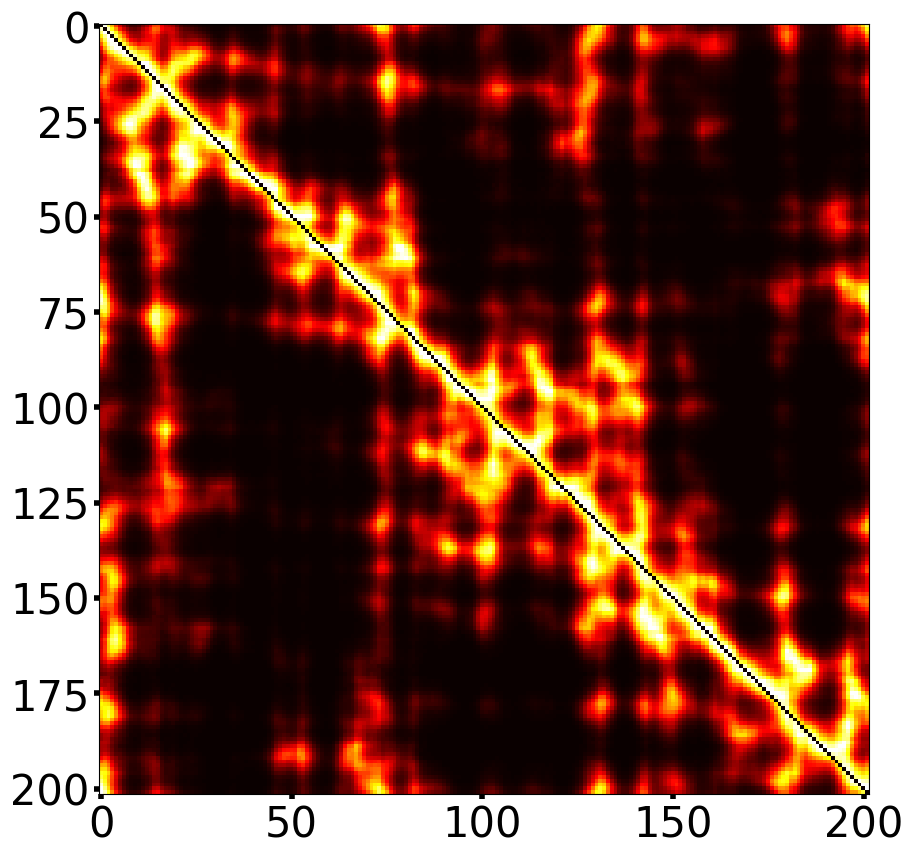

In [14]:
plot_hic(trussart_hic)

HI-C with ICE and Optimal Transport 

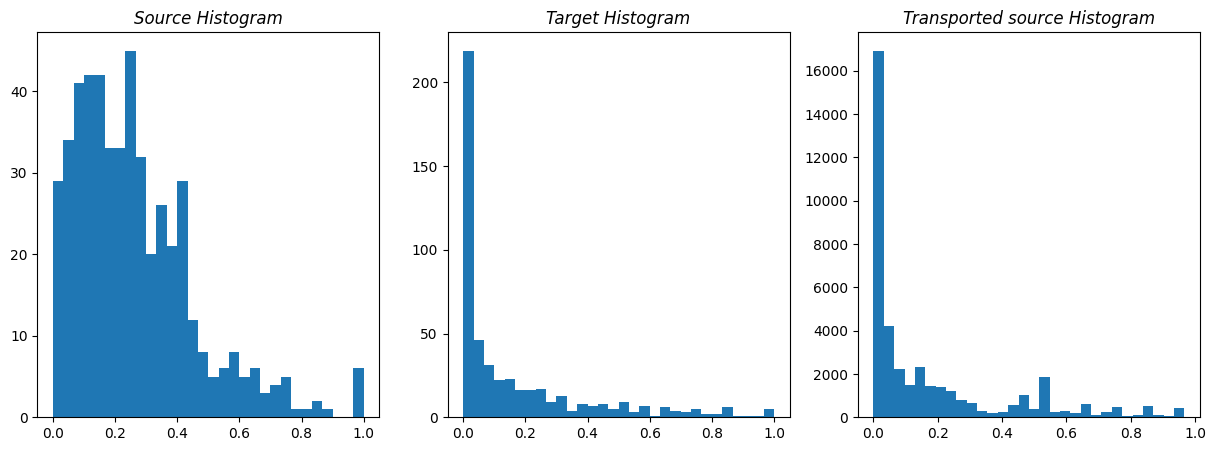

In [15]:

rng = np.random.RandomState(42)
#random.seed(seed)
#np.random.seed(seed)
new_hic, orig_hic, Xs, Xt = generate_hic(rng, synthetic_biological_structure, trussart_hic, use_ice =True, use_minmax =True, use_ot = True, use_softmax =False, seed =42, plot_optimal_transport =True, exponent =1)

plot_optimal_transport(Xs, Xt, new_hic)

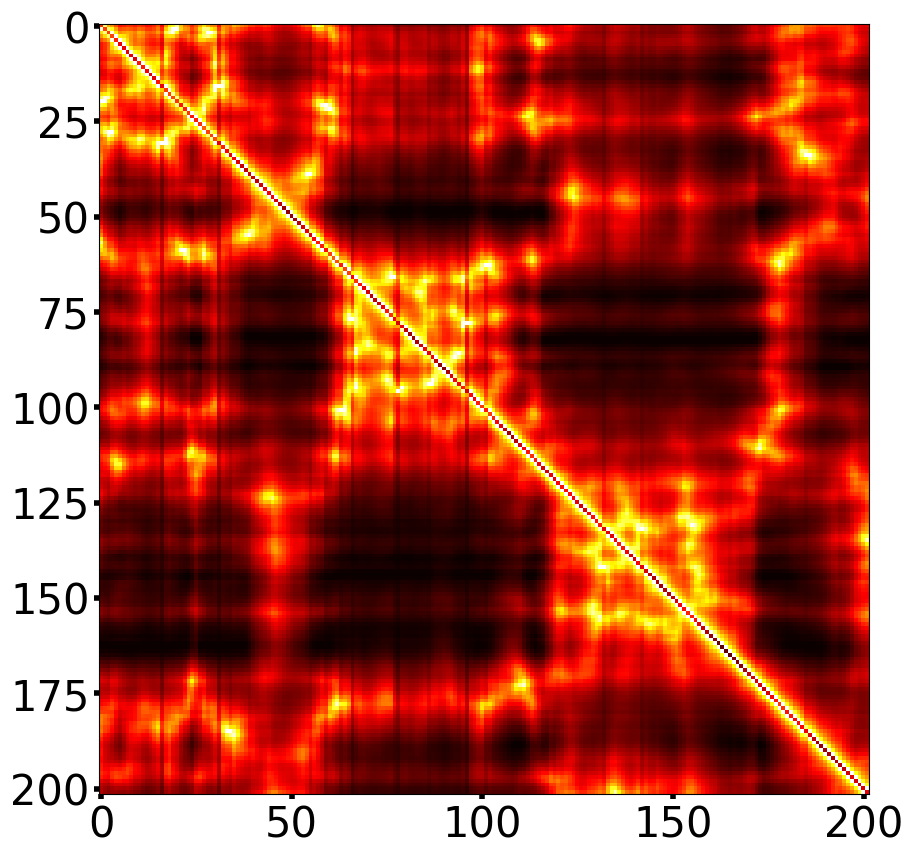

In [16]:
plot_hic(orig_hic)

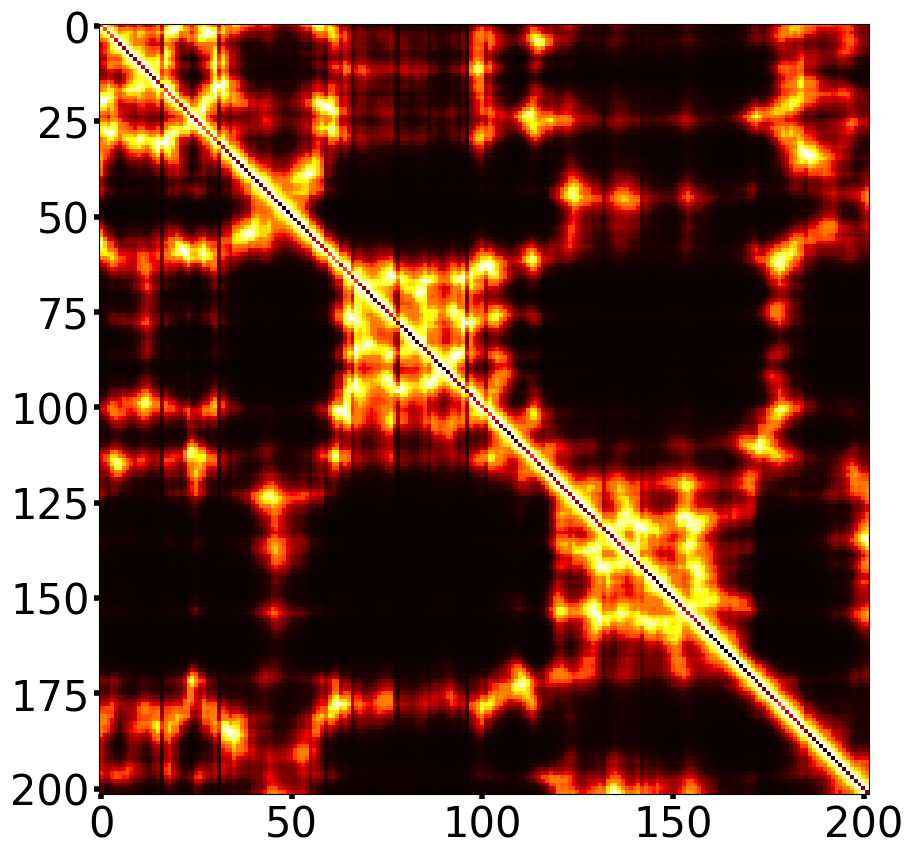

In [17]:
plot_hic(new_hic)

Generate Data

In [13]:
import random

In [14]:
rng = np.random.RandomState(SEED)
random.seed(SEED)
np.random.seed(SEED)
synthetic_biological_uniform_data_generator(rng, trussart_hic, n_structure = NB_TRAINING, data_path =  DATA_PATH,  nb_bins = NB_BINS, delta = DELTA, st_sig = ST_SIG, end_sig = END_SIG, sig = SIG, clust_sig = CLUST_SIG, clust_prob = CLUST_PROB, secondstep = SECONDSTEP, seed = SEED, alpha = EXPONENT, is_training = True , icing = ICING, minmaxuse= MINMAXUSE, transportation = TRANSPORTATION, softmaxing = SOFTMAXING)


100%|██████████| 800/800 [21:28<00:00,  1.61s/it]


In [15]:
rng = np.random.RandomState(SEED)
random.seed(SEED)
np.random.seed(SEED)
synthetic_biological_uniform_data_generator(rng, trussart_hic, n_structure = NB_testing, data_path =  DATA_PATH,  nb_bins = NB_BINS, delta = DELTA, st_sig = ST_SIG, end_sig = END_SIG, sig = SIG, clust_sig = CLUST_SIG, clust_prob = CLUST_PROB, secondstep = SECONDSTEP, seed = SEED, alpha = EXPONENT, is_training = False , icing = ICING, minmaxuse= MINMAXUSE, transportation = TRANSPORTATION, softmaxing = SOFTMAXING)

100%|██████████| 200/200 [05:16<00:00,  1.58s/it]
